# Loan Application Status Prediction:-

# Problem Statement:-

Import all the required library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing DataSet:-

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data inspection:-

In [6]:
df.shape

(614, 13)

In [7]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 614 observations with 13 features.


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
#Checking the data types of all columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

in this data set i have 3 types of columns int type,float type and object type.

In [11]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we can see There are some null values are present in this dataset

In [12]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Above are the unique value count of each column in the dataset.

Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.

In [13]:
for i in df.columns:
        print(df[i].value_counts())
        print('***********')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
***********
Male      489
Female    112
Name: Gender, dtype: int64
***********
Yes    398
No     213
Name: Married, dtype: int64
***********
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
***********
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
***********
No     500
Yes     82
Name: Self_Employed, dtype: int64
***********
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
***********
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
***********
120.0    20
110.0    17
100.0    15
160.0  

In [14]:
#Droping Loan_ID column
df = df.drop(["Loan_ID"],axis=1)

In [15]:
df.shape

(614, 12)

as we can see 1 column is deleted

In [17]:
df["CoapplicantIncome"].replace(0, df["CoapplicantIncome"].median(),inplace = True)  #replace 'o' with median

In [18]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1188.5,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1188.5,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1188.5,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1188.5,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1188.5,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1188.5,187.0,360.0,1.0,Urban,Y


# Checking Null values in the DataFrame:-

In [19]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see there are some null values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History columns.And i have to replace these null values using imputation technique.

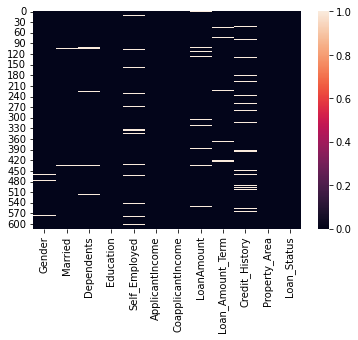

In [20]:
sns.heatmap(df.isnull())
plt.show()

from above observation we can clearly see there is many null values are present.

In [21]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    9.220570
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

# Imputation technique to replace NaN values:-

In [22]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

lets replace catagorical column with their mode values

In [24]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [25]:
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

In [26]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [27]:
#Again checking the NaN values are present or not

In [28]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

as we can see there is no null values are present in this dataset all null values are replaced

In [29]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

it has only two unique values soo it is a binary classification problem

In [30]:
df.loc[df['Loan_Status'] == " "]   #checking whether there is some empty value or not

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


As we can see there is no empty observations in our target column.

# Data Description:-

In [31]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,2149.683094,145.752443,342.410423,0.855049
std,6109.041673,2682.545729,84.107233,64.428629,0.352339
min,150.000000,16.120001,9.000000,12.000000,0.000000
25%,2877.500000,1188.500000,100.250000,360.000000,1.000000
50%,3812.500000,1199.250000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Find catagorical & numerical data:-

In [34]:
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


We can see above are the list of categorical columns.

In [35]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


we above are the list of numerical columns.

# Data Visualization:-

# Univariate Analysis:-

Y    422
N    192
Name: Loan_Status, dtype: int64


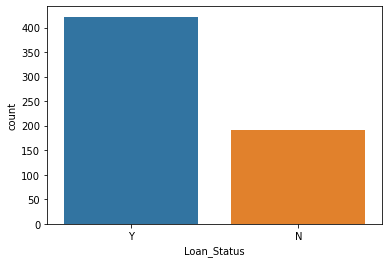

In [37]:
print(df["Loan_Status"].value_counts())   #Laon approval
sns.countplot(df["Loan_Status"])
plt.show()

From the above graph we can conclude that More number of loan has been approved that is Y=422 and N=192 has got denied..

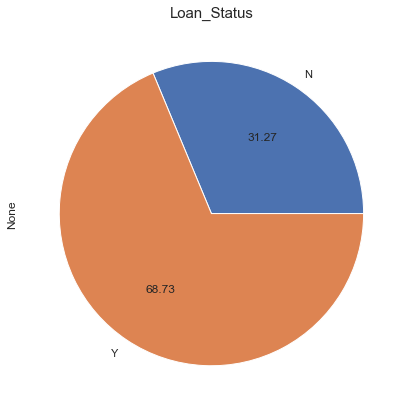

In [38]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby('Loan_Status').size().plot(kind='pie', autopct='%.2f')
plt.title('Loan_Status', fontsize=15)
plt.show()

loan approved is 68.73% here 31.27% application denied

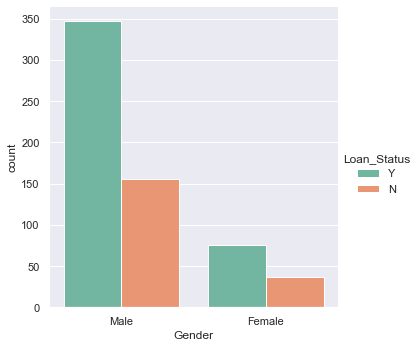

In [55]:
sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Male applicants has more chance of getting approved loan.

Male      502
Female    112
Name: Gender, dtype: int64


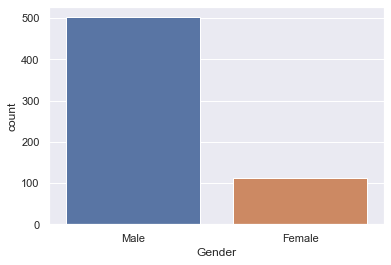

In [42]:
print(df["Gender"].value_counts())   #Laon approval
sns.countplot(df["Gender"])
plt.show()

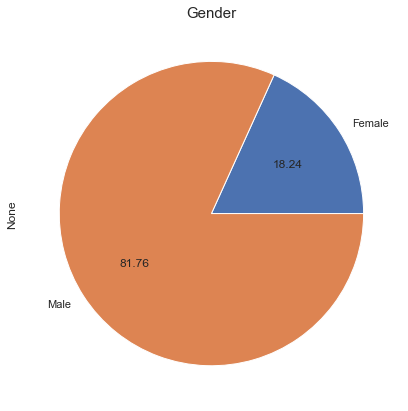

In [39]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')
plt.title('Gender', fontsize=15)
plt.show()

We can see there are more number of Male applicants applying for loan than Female applicants. 
There are about 81% of the Male candidates and only 18% of Female candidates are applying for the loan.

Yes    401
No     213
Name: Married, dtype: int64


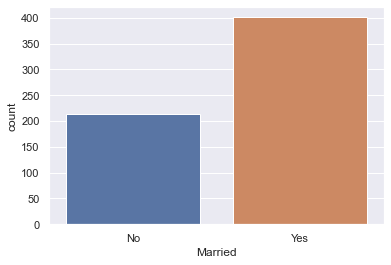

In [43]:
print(df["Married"].value_counts())
sns.countplot(df["Married"])
plt.show()

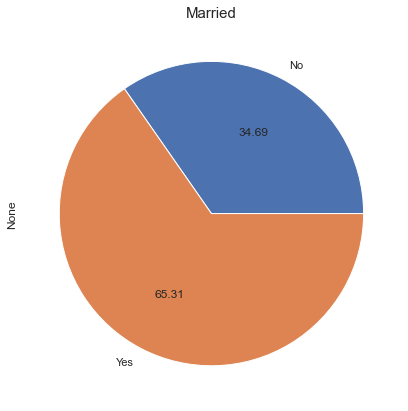

In [44]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby('Married').size().plot(kind='pie', autopct='%.2f')
plt.title('Married', fontsize=15)
plt.show()

he number of Married applicants who are applied for loan is higher than the Unmarried applicants.

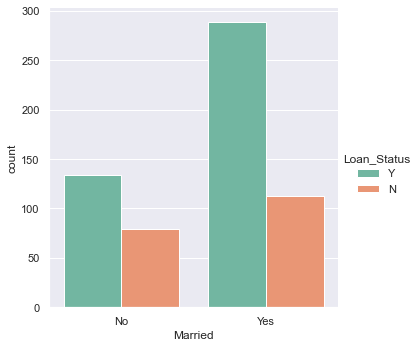

In [56]:
sns.factorplot('Married',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Married people has more chance of getting loan approved.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


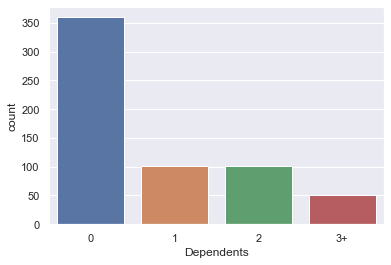

In [45]:
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

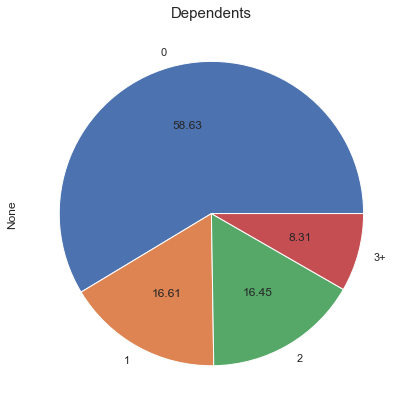

In [46]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby('Dependents').size().plot(kind='pie', autopct='%.2f')
plt.title('Dependents', fontsize=15)
plt.show()

The applicants who have 0 dependents have high counts i.e 58.63% and the applicants having more than 3 dependents counts 8.31%  which is very less.

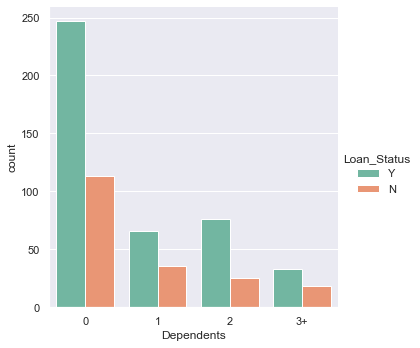

In [59]:
sns.factorplot('Dependents',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Applicants with 0 dependents has more chance of getting loan approved.

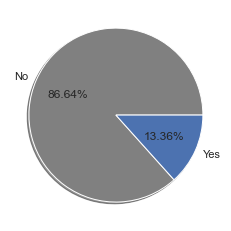

In [61]:
labels='No','Yes'
colors = ["grey", "b"]
fig, ax = plt.subplots()
ax.pie(df['Self_Employed'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


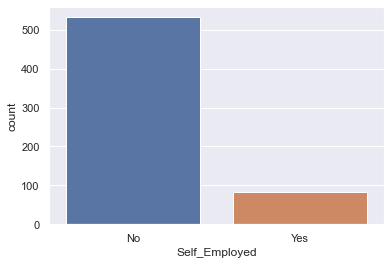

In [62]:
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

As we can see most of the loan applicants are not self employed.

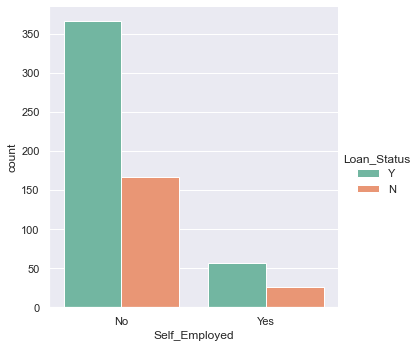

In [63]:
sns.factorplot('Self_Employed',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

The applicants who are not self employed has more chance of getting loan approved.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


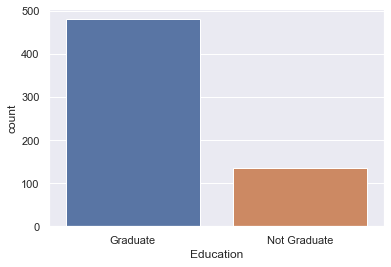

In [65]:
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

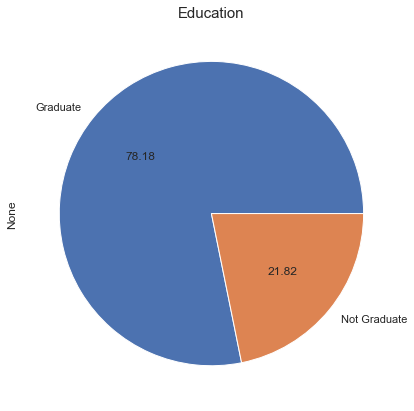

In [66]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df.groupby('Education').size().plot(kind='pie', autopct='%.2f')
plt.title('Education', fontsize=15)
plt.show()

More number of people applied for loan are Graduates i.e 480 in no and few applicants are Not Graduates.

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

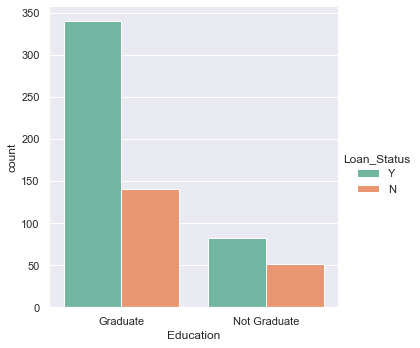

In [67]:
sns.factorplot('Education',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0)

Graduated people has more chance of getting loan approved.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


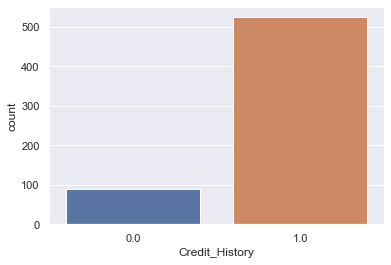

In [68]:
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

Most of the applicants who have credit history 1 are high in numbers.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

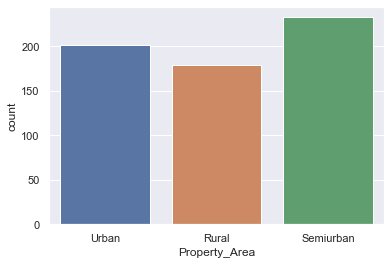

In [71]:
sns.countplot(df['Property_Area'])

Most of the loan applicants are having property in Semiurban are and very less people have property in Rural area.

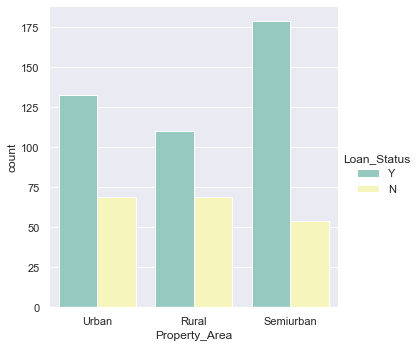

In [72]:
sns.factorplot('Property_Area',kind='count',data=df,hue='Loan_Status',palette="Set3")
plt.xticks(rotation=0);

Applicants having property in semiurban area has more chance of getting loan approved.

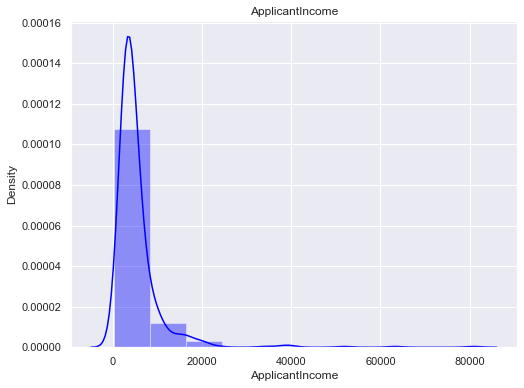

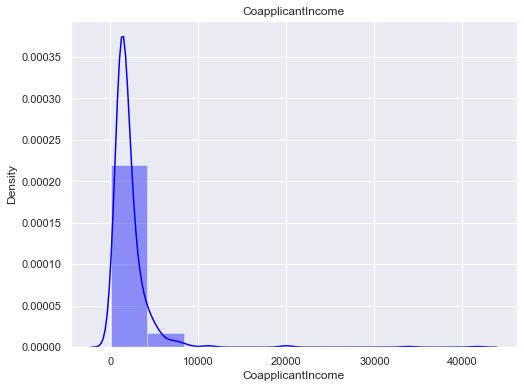

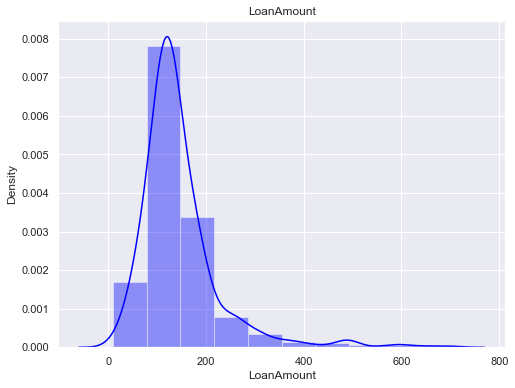

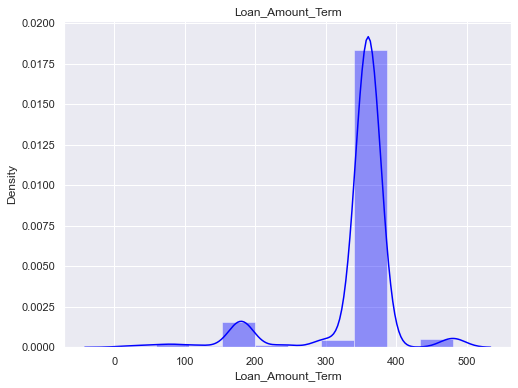

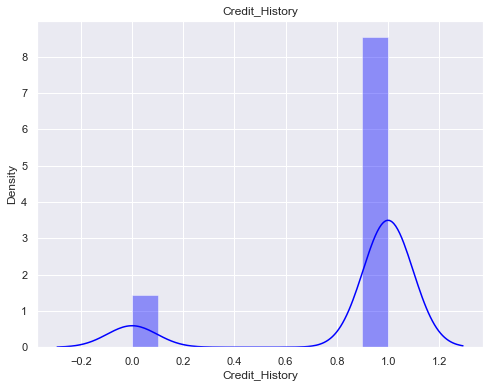

In [76]:
for i in df[numerical_columns]:              
    plt.figure(figsize = (8,6))
    sns.distplot(df[i], bins = 10, color="blue")
    plt.title(i)
    plt.show()

we can see all numerical culumns are skewed

# Bivariate Analysis:-

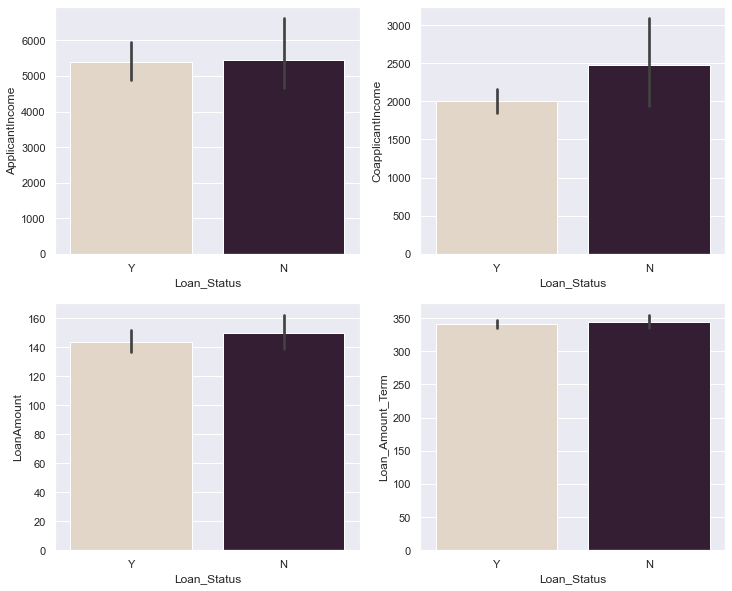

In [78]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Loan_Status with ApplicantIncome
sns.barplot(x='Loan_Status',y='ApplicantIncome',ax=axes[0,0],data=df,palette='ch:.25')

# Checking Loan_Status with Loan_Amount_Term
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',ax=axes[1,1],data=df,palette='ch:.25')

# Checking Loan_Status with CoapplicantIncome
sns.barplot(x='Loan_Status',y='CoapplicantIncome',ax=axes[0,1],data=df,palette='ch:.25')

# Checking Loan_Status with LoanAmount
sns.barplot(x='Loan_Status',y='LoanAmount',ax=axes[1,0],data=df,palette='ch:.25')

plt.show()

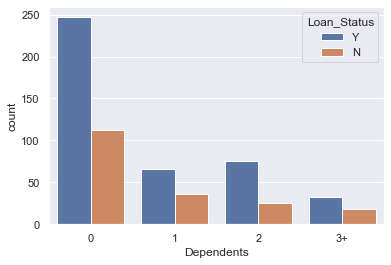

In [79]:
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

The count of 0 dependents is high which means most of the applicants have no dependents.The applicants who have dependents 0 are more likely to get their loan approved.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


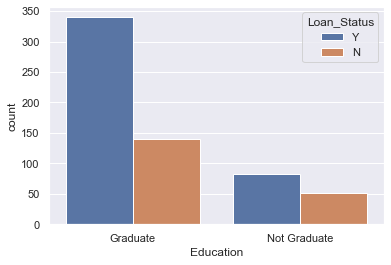

In [80]:
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()

Most of the applicants who are applying for loan are graduated and only few are not graduated. Also the applicants who are graduated have tendency of getting loans than who are not.

<AxesSubplot:title={'center':'Comparision between ApplicantIncome and LoanAmount'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

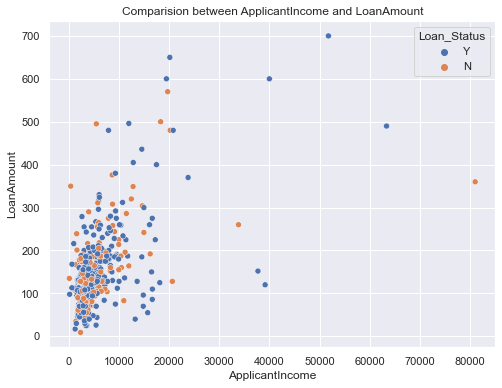

In [81]:
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status'])

As we can see in abov fig there is a high density of points in the range of 0-2000 for ApplicantIncome, and 0-300 for loan amount which means if Applicants income is in the range of 0-2000 then the loan amount will be approved in the range 0-300.

<AxesSubplot:title={'center':'Comparision between ApplicantIncome and Credit_History'}, xlabel='ApplicantIncome', ylabel='Credit_History'>

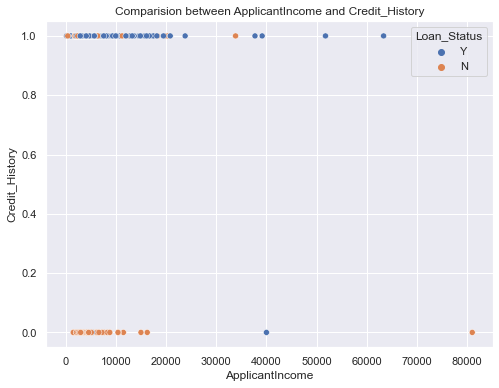

In [82]:
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and Credit_History')
sns.scatterplot(df['ApplicantIncome'],df['Credit_History'],hue=df['Loan_Status'])

as we can see If the applicant has credit history 1 then the chance of getting loan approved.

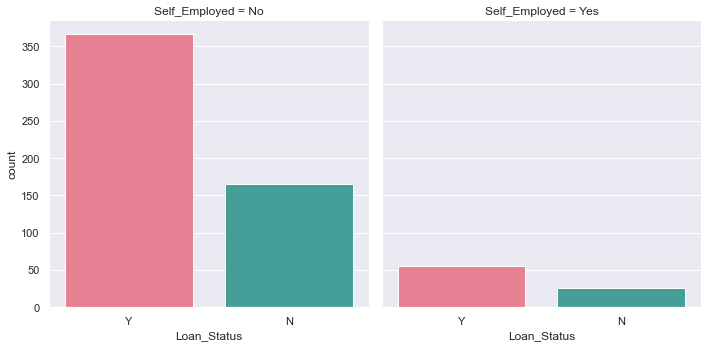

In [83]:
sns.catplot(x='Loan_Status',col='Self_Employed',data=df,kind='count',palette="husl")

from above observation we can see applicants who are not self employed has more chance of getting loan approved.

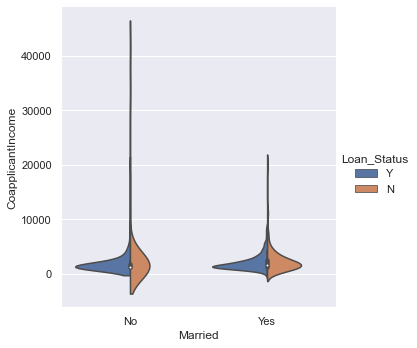

In [86]:
sns.catplot(x = "Married", y = "CoapplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)

from above violin plot we can see married people has more chance of getting loan approved

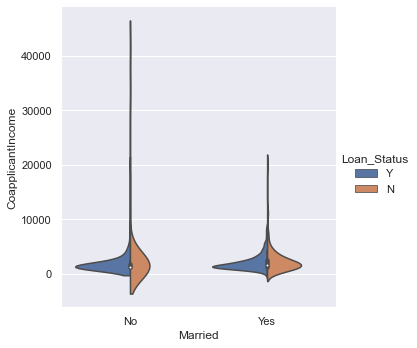

In [85]:
sns.catplot(x = "Married", y = "CoapplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)

Married people has more chance of getting loan approved

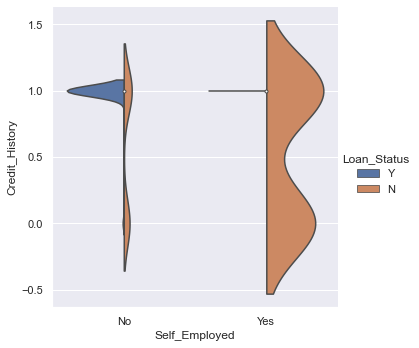

In [87]:
sns.catplot(x = "Self_Employed", y = "Credit_History", hue = "Loan_Status", kind = "violin", data=df, split=True)

We can see there is very less chance of getting loan approved for self employed applicants.

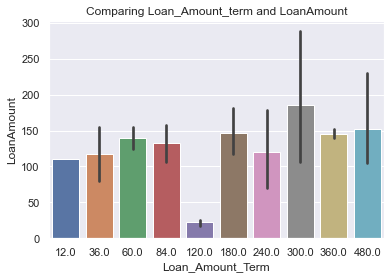

In [88]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.title("Comparing Loan_Amount_term and LoanAmount")
plt.show()

we can see the loan amount term 300.0 is high with loan amount compared to others.

# Multivariate Analysis:-

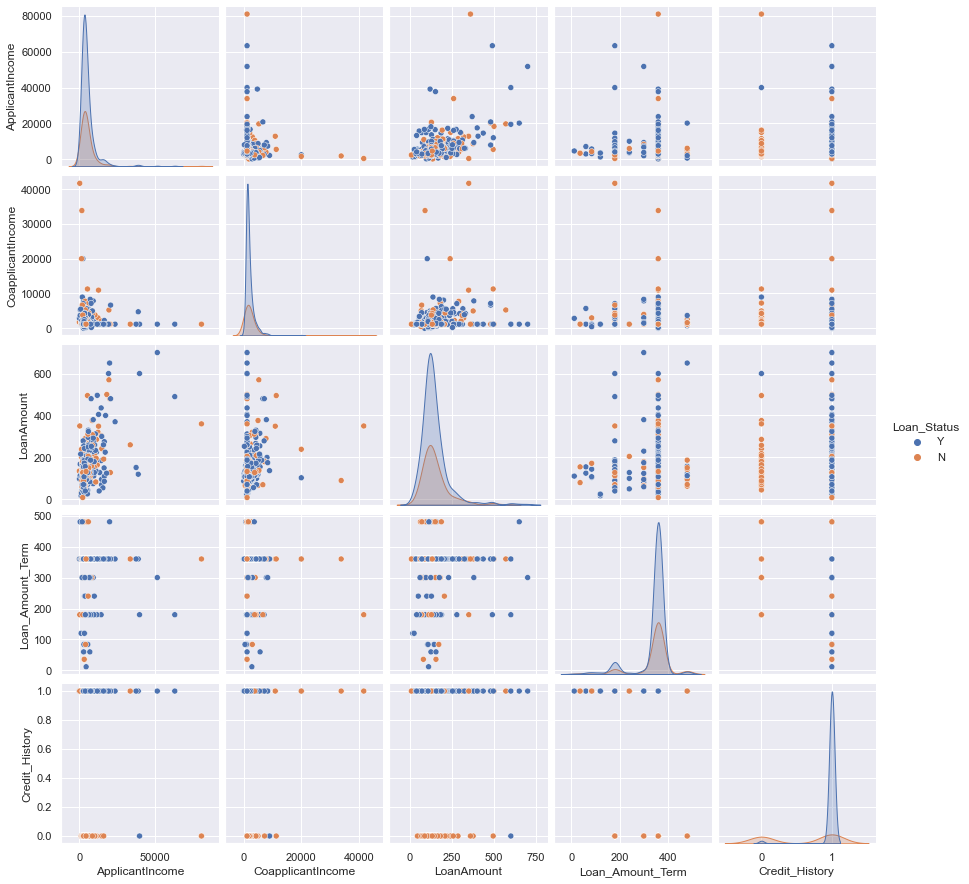

In [89]:
sns.pairplot(df,hue="Loan_Status")  #pairwise relation

# Checking Outliers:-

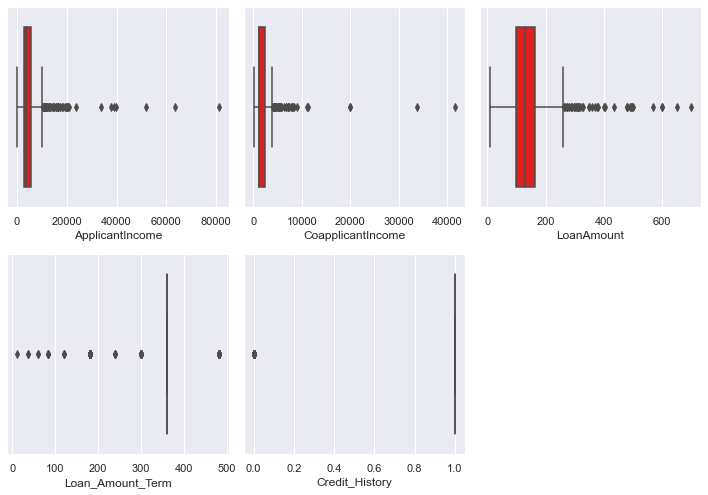

In [93]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

ApplicantIncome         AxesSubplot(0.125,0.749828;0.133621x0.130172)
CoapplicantIncome    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
LoanAmount            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Loan_Amount_Term     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Credit_History       AxesSubplot(0.766379,0.749828;0.133621x0.130172)
dtype: object

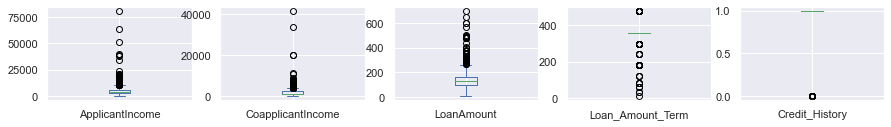

In [94]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

# Removing outliers using Zscore:-

In [95]:
features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [96]:
from scipy.stats import zscore

In [97]:
z=np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.358602,0.211241,0.273231
1,0.134412,0.239402,0.211241,0.273231
2,0.393747,0.358602,0.948996,0.273231
3,0.462062,0.077720,0.306435,0.273231
4,0.097728,0.358602,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.358602,0.889500,0.273231
610,0.212557,0.358602,1.258378,2.522836
611,0.437174,0.712473,1.276168,0.273231
612,0.357064,0.358602,0.490816,0.273231


In [98]:
new_df=df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1188.5,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1188.5,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1188.5,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1188.5,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1188.5,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1188.5,187.0,360.0,1.0,Urban,Y


In [99]:
df.shape

(614, 12)

Before removing the outliers we had 614 rows and 12 columns in our dataset.

In [100]:
new_df.shape

(577, 12)

In my new dataset i have 577 rows and 12 columns.

# % of data loss:-

In [101]:
data_loss = (614-577)/614*100
data_loss

6.026058631921824

Using Zscore i have lost 6.02% of data.

# IQR (Inter Quantile Range) method:-

In [102]:
# 1st quantile
Q1=features.quantile(0.25)
# 3rd quantile
Q3=features.quantile(0.75)
# IQR
IQR=Q3 - Q1

In [103]:
df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [105]:
df1.shape

(434, 12)

Using IQR method the dataframe has 434 rows and 12 columns.

# % of data loss:-

In [107]:
data_loss = (614-434)/614*100
data_loss

29.31596091205212

Using IQR method I am losing 29.31% of data

# Checking skewness:-

In [108]:
new_df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    2.326156
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

The skewness present in all the above columns. Here the columns Credit_History and Loan_Amount_Term have categorical data of integer type so no need to remove skewness in these columns.

# Removing Skewness using yeo-johnson method:-

In [109]:
skew=['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [111]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')

In [112]:
new_df[skew]=scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-0.630951,0.000771
1,0.234783,-0.200652,0.000771
2,-0.527201,-0.630951,-1.437336
3,-0.791972,0.628769,-0.153545
4,0.728848,-0.630951,0.238260


In [113]:
new_df.skew()

ApplicantIncome      0.027981
CoapplicantIncome    0.079601
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

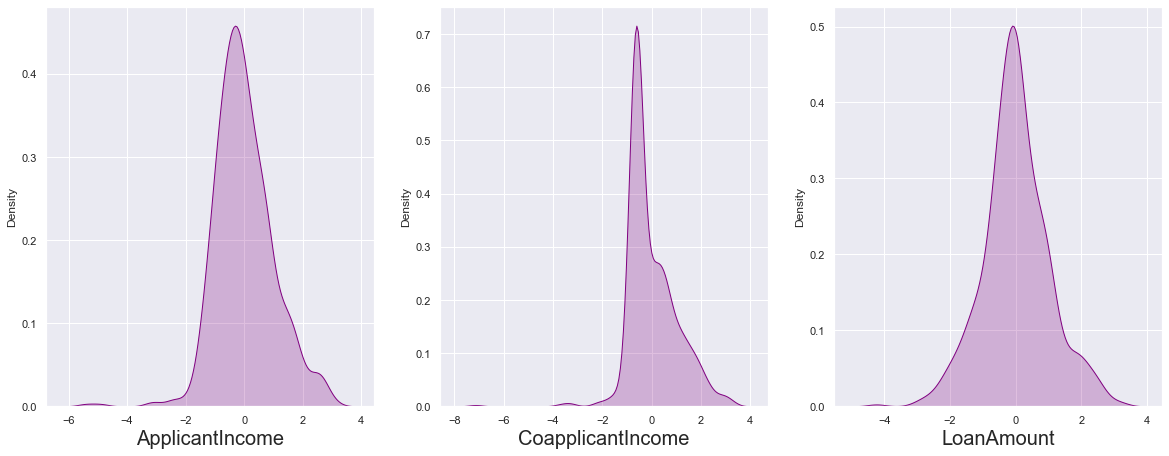

In [114]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in new_df[skew]:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='purple',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

It looks like the skewness is removed completely.

# Encoding the data useing LabelEncoding:-

In [119]:
categorical_col=[]
for i in new_df.dtypes.index:
    if new_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [120]:
categorical_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [123]:
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


The categorical columns has been converted into numerical columns by using label encoding.

# Checking Correlation:-

In [124]:
# lets check Correlation between the target variable and independent variables by  HEAT map method

In [125]:
cor = new_df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.137334,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.139109,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,-0.066972,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,-0.060180,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.012839,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.185490,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.137334,0.139109,-0.066972,-0.060180,-0.012839,-0.185490,1.000000,0.304356,-0.068870,-0.032656,-0.082216,0.000762
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.304356,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,-0.068870,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,-0.032656,-0.003626,0.027392,1.000000,-0.008121,0.560936


This gives the correlation between the denpendent and independent variables

<AxesSubplot:>

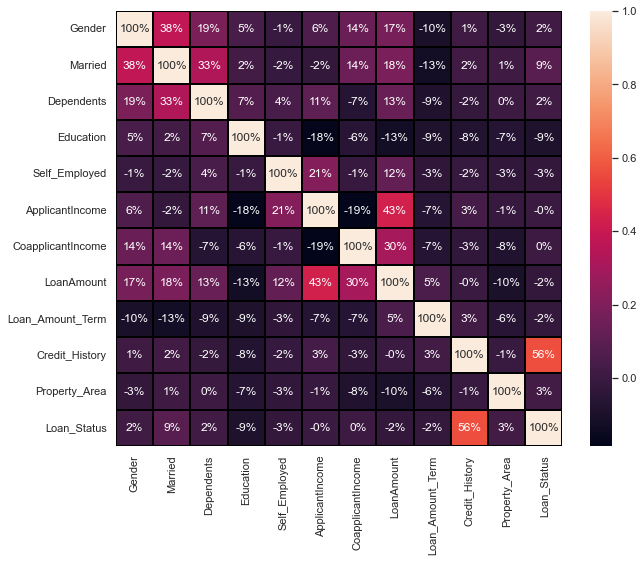

In [127]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),annot=True,linewidth=0.01,linecolor='black',fmt='0.0%')

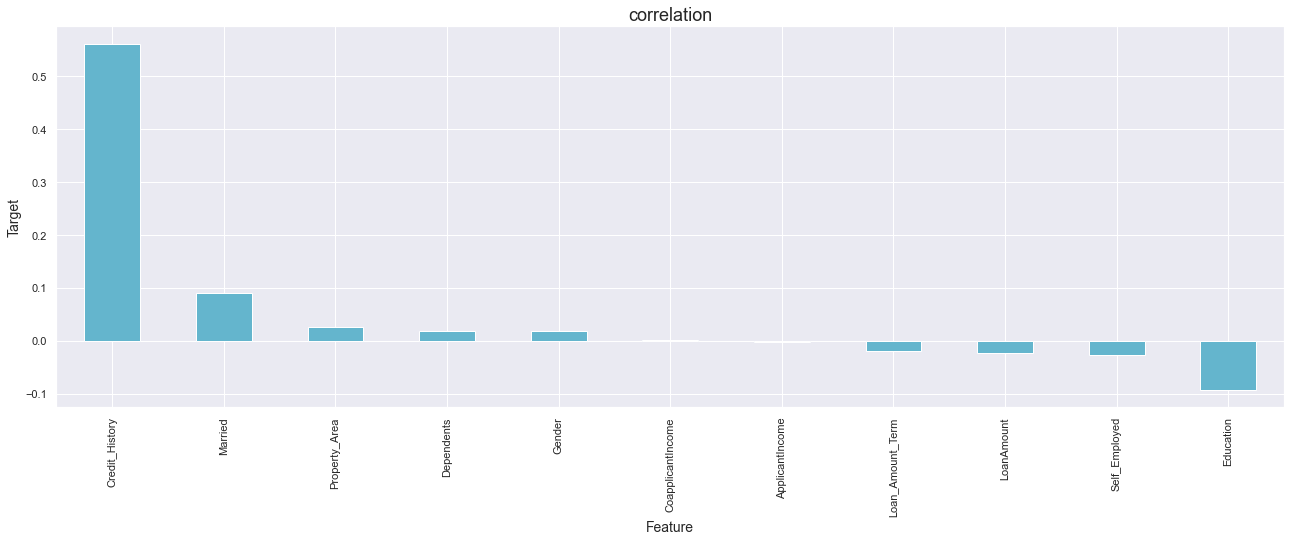

In [128]:
plt.figure(figsize=(22,7))
new_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Here the columns ApplicantIncome has very less correlation with the target so we can drop this column if necessary.

# Separating the features and label into x & y:-

In [130]:
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

In [131]:
x.shape

(577, 11)

In [132]:
y.shape

(577,)

# Scaling the data using standard scaler:-

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-0.630951,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,-0.200652,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-0.630951,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.628769,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-0.630951,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-0.630951,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-0.630951,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,-3.325528,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-0.630951,0.976055,0.230853,0.418513,1.227472


# Finding Best Random State and Accuracy:-

In [139]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [145]:
from sklearn.ensemble import RandomForestClassifier

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rfc= RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred =rfc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    print('accuracy : ',acc,'random state :',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

accuracy :  0.7816091954022989 random state : 1
accuracy :  0.8045977011494253 random state : 2
accuracy :  0.8103448275862069 random state : 3
accuracy :  0.7701149425287356 random state : 4
accuracy :  0.7528735632183908 random state : 5
accuracy :  0.7988505747126436 random state : 6
accuracy :  0.7931034482758621 random state : 7
accuracy :  0.7931034482758621 random state : 8
accuracy :  0.7988505747126436 random state : 9
accuracy :  0.8160919540229885 random state : 10
accuracy :  0.8160919540229885 random state : 11
accuracy :  0.8390804597701149 random state : 12
accuracy :  0.7931034482758621 random state : 13
accuracy :  0.764367816091954 random state : 14
accuracy :  0.7873563218390804 random state : 15
accuracy :  0.7931034482758621 random state : 16
accuracy :  0.7873563218390804 random state : 17
accuracy :  0.735632183908046 random state : 18
accuracy :  0.7988505747126436 random state : 19
accuracy :  0.7758620689655172 random state : 20
accuracy :  0.8103448275862069 

In [146]:
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.867816091954023  on Random_state  86


# Creating train test split:-

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Classification Algorithms:-

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier:-

In [153]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print('accuracy is :-',accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

accuracy is :- 0.7701149425287356
[[ 32  23]
 [ 17 102]]
              precision    recall  f1-score   support

           0       0.65      0.58      0.62        55
           1       0.82      0.86      0.84       119

    accuracy                           0.77       174
   macro avg       0.73      0.72      0.73       174
weighted avg       0.76      0.77      0.77       174



Accuracy by using Decision Tree Classifier is 77%

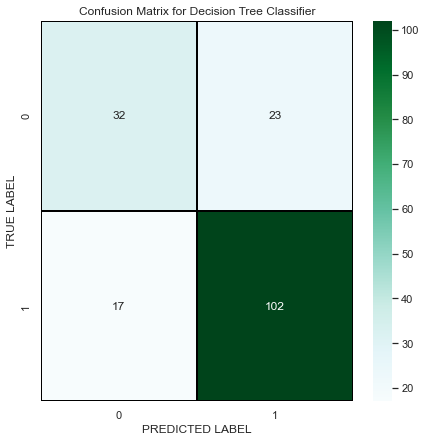

In [155]:
cm = confusion_matrix(y_test,predDTC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Here we can see True positive is 32 & true negative is 102
and also there is 23 false positive and 17 false negative.

# Random Forest Classifier:-

In [157]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
# Prediction
predRFC = RFC.predict(x_test)

print('Accuracy is : ',accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

Accuracy is :  0.867816091954023
[[ 36  19]
 [  4 115]]
              precision    recall  f1-score   support

           0       0.90      0.65      0.76        55
           1       0.86      0.97      0.91       119

    accuracy                           0.87       174
   macro avg       0.88      0.81      0.83       174
weighted avg       0.87      0.87      0.86       174



The accuracy by using Random Forest Classifier is 86%.

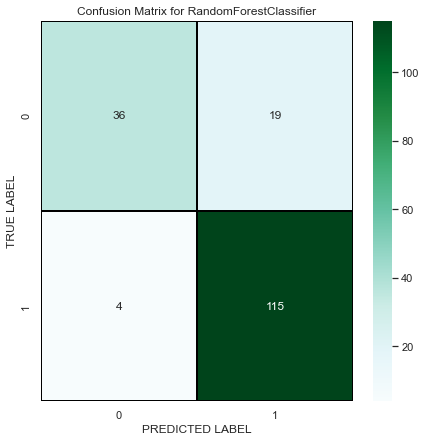

In [158]:
cm = confusion_matrix(y_test,predRFC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Logistic Regression:-

In [160]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)

print('Accuracy is : ',accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.867816091954023
[[ 32  23]
 [  0 119]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        55
           1       0.84      1.00      0.91       119

    accuracy                           0.87       174
   macro avg       0.92      0.79      0.82       174
weighted avg       0.89      0.87      0.86       174



The accuracy using Logistic Regression Classifier is 86%.

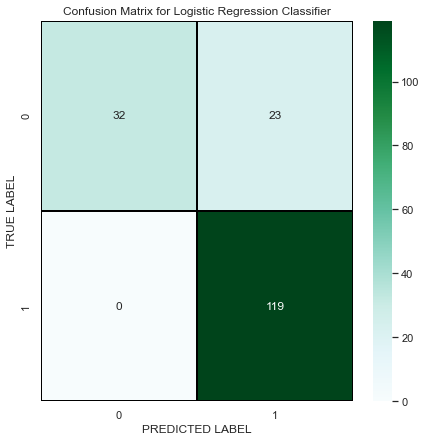

In [163]:
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Support Vector Machine Classifier:-

In [164]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print('Accuracy is : ',accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

Accuracy is :  0.867816091954023
[[ 32  23]
 [  0 119]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        55
           1       0.84      1.00      0.91       119

    accuracy                           0.87       174
   macro avg       0.92      0.79      0.82       174
weighted avg       0.89      0.87      0.86       174



The accuracy using SVC is 86%.

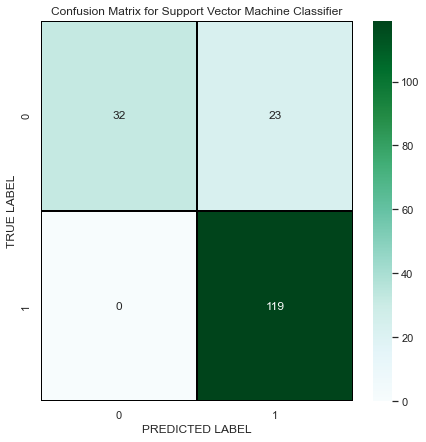

In [165]:
cm = confusion_matrix(y_test,predsvc)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# KNeighbors Classifier:-

In [166]:
knn = KNN()
knn.fit(x_train,y_train)
# Prediction
predknn = knn.predict(x_test)

print('Accuracy is : ',accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

Accuracy is :  0.8333333333333334
[[ 30  25]
 [  4 115]]
              precision    recall  f1-score   support

           0       0.88      0.55      0.67        55
           1       0.82      0.97      0.89       119

    accuracy                           0.83       174
   macro avg       0.85      0.76      0.78       174
weighted avg       0.84      0.83      0.82       174



The accuracy using KNeighbors Classifier is 83%.

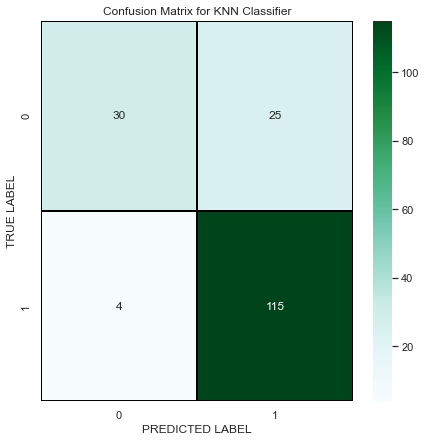

In [167]:
cm = confusion_matrix(y_test,predknn)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Gradient Boosting Classifier:-

In [169]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
# Prediction
predGB = GB.predict(x_test)

print('Accuracy is : ',accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

Accuracy is :  0.8390804597701149
[[ 33  22]
 [  6 113]]
              precision    recall  f1-score   support

           0       0.85      0.60      0.70        55
           1       0.84      0.95      0.89       119

    accuracy                           0.84       174
   macro avg       0.84      0.77      0.80       174
weighted avg       0.84      0.84      0.83       174



The accuracy using Gradient Boosting Classifier is 83%.

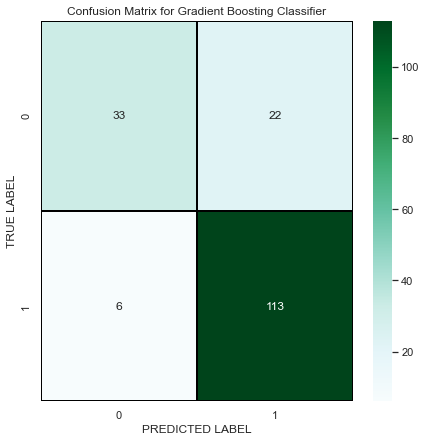

In [170]:
cm = confusion_matrix(y_test,predGB)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# AdaBoost Classifier:-

In [171]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print('Accuracy is : ',accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

Accuracy is :  0.7816091954022989
[[ 33  22]
 [ 16 103]]
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        55
           1       0.82      0.87      0.84       119

    accuracy                           0.78       174
   macro avg       0.75      0.73      0.74       174
weighted avg       0.78      0.78      0.78       174



The accuracy using AdaBoost Classifier is 78%.

# GaussianNB Classifier:-

In [176]:
NB = GaussianNB()
NB.fit(x_train,y_train)
# Prediction
predNB = NB.predict(x_test)

print('Accuracy is : ',accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test,predNB))

Accuracy is :  0.8620689655172413
[[ 32  23]
 [  1 118]]
              precision    recall  f1-score   support

           0       0.97      0.58      0.73        55
           1       0.84      0.99      0.91       119

    accuracy                           0.86       174
   macro avg       0.90      0.79      0.82       174
weighted avg       0.88      0.86      0.85       174



The accuracy using GaussianNB Classifier is 86%.

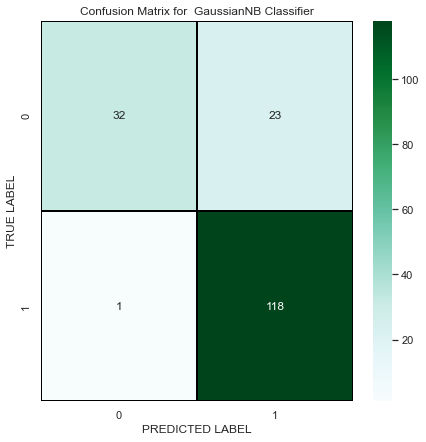

In [177]:
cm = confusion_matrix(y_test,predNB)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GaussianNB Classifier')
plt.show()

# Checking Cross Validation Score:-

In [178]:
from sklearn.model_selection import cross_val_score

In [191]:
scr=cross_val_score(LR,x,y,cv=5)
print('Cross Validation score of Logistic Regression model : ',scr.mean())

Cross Validation score of Logistic Regression model :  0.8163418290854573


In [198]:
scr2=cross_val_score(DTC,x,y,cv=5)
print('Cross Validation score of Decision tree model : ',scr2.mean())

Cross Validation score of Decision tree model :  0.7314092953523238


In [190]:
scr3=cross_val_score(RFC,x,y,cv=5)
print('Cross Validation score of Random Forest model : ',scr3.mean())

Cross Validation score of Random Forest model :  0.7920689655172414


In [182]:
scr4=cross_val_score(knn,x,y,cv=5)
print('Cross Validation score of SVC model : ',scr4.mean())

Cross Validation score of SVC model :  0.7903148425787107


In [186]:
scr5=cross_val_score(GB,x,y,cv=5)
print('Cross Validation score of GB model : ',scr5.mean())

Cross Validation score of GB model :  0.7973463268365817


In [187]:
scr6=cross_val_score(ABC,x,y,cv=5)
print('Cross Validation score of ABC model : ',scr6.mean())

Cross Validation score of ABC model :  0.7973313343328337


In [188]:
scr7=cross_val_score(NB,x,y,cv=5)
print('Cross Validation score of NB model : ',scr7.mean())

Cross Validation score of NB model :  0.812863568215892


By looking into the difference of model accuracy and cross validation score i found the least difference in RFC.So RFC is my best model.

# Hyper Parameter Tuning:-

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [208]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [210]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [211]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [213]:
Final_mod=RandomForestClassifier(criterion='entropy',max_depth=20, max_features='auto', n_estimators=200)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

87.35632183908046


After tuning the accuracy almost same which is 87%...its tune upto 1-2%.....and the score is really very good

So here the RFC is best model with an accuracy of 87.35% after tunning.

# ROC-AUC curve:-

In [214]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

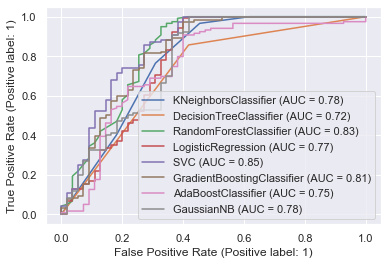

In [222]:
disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(NB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

we can see above is the ROC curves for all the models that i have predicted.And the AUC values can also be seen in the plot.

# Saving the model:-

In [223]:
#Saving the model as .pkl file
import joblib

joblib.dump(Final_mod,"Loan_application_prediction_project.pkl")

['Loan_application_prediction_project.pkl']

here i have saved the model as Loan_application_prediction_project.pkl.

# Lets Predicting the saved model:-

In [224]:
model=joblib.load("Loan_application_prediction_project.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [225]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"]).T

,Predicted,Actual
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
169,1,0
170,1,1
171,1,1
172,1,0


We can see above are the predicted values and the actual values.They are almost similar.